In [3]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Define dataset directories
base_dir = r'D:\\PENELITIAN\\PENELITIAN - DIASH - BAKTERI\\Bacteria Data for Machine Vision and Digital Biology\\Bacteria Data for Machine Vision and Digital Biology\\Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Load datasets from separate folders
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
valloader = DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=4)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=4)

# Print dataset sizes
print(f"Train size: {len(train_dataset)} samples, {len(train_dataset.classes)} classes")
print(f"Validation size: {len(val_dataset)} samples")
print(f"Test size: {len(test_dataset)} samples")

# Print class names (should be the same for all splits)
print("\nClass names:", train_dataset.classes)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\\\PENELITIAN\\\\PENELITIAN - DIASH - BAKTERI\\\\Bacteria Data for Machine Vision and Digital Biology\\\\Bacteria Data for Machine Vision and Digital Biology\\\\Dataset\\train'

In [4]:
import torch
print(torch.cuda.is_available())  # Harus mengembalikan True jika CUDA tersedia


True


In [3]:
# Zufar's code
import torch
from vit_pytorch.t2t import T2TViT

v = T2TViT(
    dim = 512,
    image_size = 256,
    depth = 5,
    heads = 8,
    mlp_dim = 512,
    num_classes = 30,
    t2t_layers = ((7, 4), (3, 2), (3, 2)) # tuples of the kernel size and stride of each consecutive layers of the initial token to token module
)

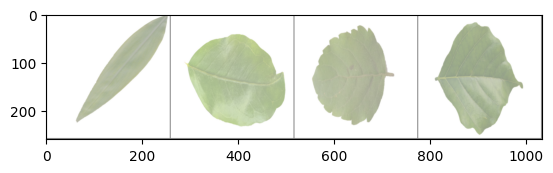

Alpinia Galanga (Rasna) Punica Granatum (Pomegranate) Ocimum Tenuiflorum (Tulsi) Pongamia Pinnata (Indian Beech)


In [4]:
import numpy as np
import torchvision

import matplotlib.pyplot as plt

# Ambil batch pertama dari train_loader
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Fungsi untuk menampilkan gambar
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Tampilkan grid gambar
imshow(torchvision.utils.make_grid(images))

# Tampilkan label
classes = ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [6]:
v.to(device)

T2TViT(
  (to_patch_embedding): Sequential(
    (0): Identity()
    (1): Unfold(kernel_size=7, dilation=1, padding=2, stride=4)
    (2): Rearrange('b c n -> b n c')
    (3): Transformer(
      (norm): LayerNorm((147,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0): ModuleList(
          (0): Attention(
            (norm): LayerNorm((147,), eps=1e-05, elementwise_affine=True)
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.0, inplace=False)
            (to_qkv): Linear(in_features=147, out_features=441, bias=False)
            (to_out): Identity()
          )
          (1): FeedForward(
            (net): Sequential(
              (0): LayerNorm((147,), eps=1e-05, elementwise_affine=True)
              (1): Linear(in_features=147, out_features=147, bias=True)
              (2): GELU(approximate='none')
              (3): Dropout(p=0.0, inplace=False)
              (4): Linear(in_features=147, out_features=147, bias=True)
           

Kode Zufar

Kode Zufar + GPT tambahin akurasi doang

Epoch 1/100: 321it [00:10, 30.53it/s]


Epoch [1/100], Training Accuracy: 15.58%, Training Loss: 3.0620
Epoch [1/100], Validation Accuracy: 17.82%, Validation Loss: 2.7032
New best model found at epoch 1 with validation accuracy: 17.82%


Epoch 2/100: 321it [00:09, 35.61it/s]


Epoch [2/100], Training Accuracy: 23.83%, Training Loss: 2.5685
Epoch [2/100], Validation Accuracy: 22.55%, Validation Loss: 2.7008
New best model found at epoch 2 with validation accuracy: 22.55%


Epoch 3/100: 321it [00:09, 35.22it/s]


Epoch [3/100], Training Accuracy: 29.21%, Training Loss: 2.3252
Epoch [3/100], Validation Accuracy: 31.27%, Validation Loss: 2.2794
New best model found at epoch 3 with validation accuracy: 31.27%


Epoch 4/100: 321it [00:08, 35.84it/s]


Epoch [4/100], Training Accuracy: 32.94%, Training Loss: 2.1941
Epoch [4/100], Validation Accuracy: 29.45%, Validation Loss: 2.1593


Epoch 5/100: 321it [00:09, 35.49it/s]


Epoch [5/100], Training Accuracy: 37.62%, Training Loss: 2.0157
Epoch [5/100], Validation Accuracy: 29.82%, Validation Loss: 2.1017


Epoch 6/100: 321it [00:09, 35.06it/s]


Epoch [6/100], Training Accuracy: 42.06%, Training Loss: 1.8852
Epoch [6/100], Validation Accuracy: 40.73%, Validation Loss: 2.0116
New best model found at epoch 6 with validation accuracy: 40.73%


Epoch 7/100: 321it [00:09, 35.63it/s]


Epoch [7/100], Training Accuracy: 46.34%, Training Loss: 1.6939
Epoch [7/100], Validation Accuracy: 48.00%, Validation Loss: 1.7096
New best model found at epoch 7 with validation accuracy: 48.00%


Epoch 8/100: 321it [00:09, 35.53it/s]


Epoch [8/100], Training Accuracy: 51.25%, Training Loss: 1.5249
Epoch [8/100], Validation Accuracy: 49.45%, Validation Loss: 1.5869
New best model found at epoch 8 with validation accuracy: 49.45%


Epoch 9/100: 321it [00:09, 35.06it/s]


Epoch [9/100], Training Accuracy: 57.94%, Training Loss: 1.3721
Epoch [9/100], Validation Accuracy: 46.18%, Validation Loss: 1.8512


Epoch 10/100: 321it [00:09, 35.47it/s]


Epoch [10/100], Training Accuracy: 58.18%, Training Loss: 1.2800
Epoch [10/100], Validation Accuracy: 57.82%, Validation Loss: 1.4064
New best model found at epoch 10 with validation accuracy: 57.82%


Epoch 11/100: 321it [00:09, 35.40it/s]


Epoch [11/100], Training Accuracy: 66.12%, Training Loss: 1.0681
Epoch [11/100], Validation Accuracy: 59.64%, Validation Loss: 1.2743
New best model found at epoch 11 with validation accuracy: 59.64%


Epoch 12/100: 321it [00:09, 35.66it/s]


Epoch [12/100], Training Accuracy: 67.91%, Training Loss: 0.9906
Epoch [12/100], Validation Accuracy: 58.91%, Validation Loss: 1.3068


Epoch 13/100: 321it [00:09, 35.37it/s]


Epoch [13/100], Training Accuracy: 66.59%, Training Loss: 1.0188
Epoch [13/100], Validation Accuracy: 61.09%, Validation Loss: 1.2565
New best model found at epoch 13 with validation accuracy: 61.09%


Epoch 14/100: 321it [00:09, 35.28it/s]


Epoch [14/100], Training Accuracy: 71.57%, Training Loss: 0.8517
Epoch [14/100], Validation Accuracy: 64.00%, Validation Loss: 1.2074
New best model found at epoch 14 with validation accuracy: 64.00%


Epoch 15/100: 321it [00:09, 35.05it/s]


Epoch [15/100], Training Accuracy: 73.75%, Training Loss: 0.7611
Epoch [15/100], Validation Accuracy: 65.45%, Validation Loss: 1.3309
New best model found at epoch 15 with validation accuracy: 65.45%


Epoch 16/100: 321it [00:09, 35.55it/s]


Epoch [16/100], Training Accuracy: 74.53%, Training Loss: 0.7719
Epoch [16/100], Validation Accuracy: 69.09%, Validation Loss: 1.0769
New best model found at epoch 16 with validation accuracy: 69.09%


Epoch 17/100: 321it [00:09, 35.26it/s]


Epoch [17/100], Training Accuracy: 77.34%, Training Loss: 0.6325
Epoch [17/100], Validation Accuracy: 68.36%, Validation Loss: 1.0672


Epoch 18/100: 321it [00:09, 35.24it/s]


Epoch [18/100], Training Accuracy: 80.06%, Training Loss: 0.6160
Epoch [18/100], Validation Accuracy: 65.45%, Validation Loss: 1.3124


Epoch 19/100: 321it [00:09, 35.31it/s]


Epoch [19/100], Training Accuracy: 80.76%, Training Loss: 0.5599
Epoch [19/100], Validation Accuracy: 72.73%, Validation Loss: 0.8615
New best model found at epoch 19 with validation accuracy: 72.73%


Epoch 20/100: 321it [00:09, 35.35it/s]


Epoch [20/100], Training Accuracy: 81.46%, Training Loss: 0.5395
Epoch [20/100], Validation Accuracy: 74.91%, Validation Loss: 0.9897
New best model found at epoch 20 with validation accuracy: 74.91%


Epoch 21/100: 321it [00:09, 35.57it/s]


Epoch [21/100], Training Accuracy: 78.43%, Training Loss: 0.6892
Epoch [21/100], Validation Accuracy: 57.09%, Validation Loss: 1.6995


Epoch 22/100: 321it [00:09, 35.36it/s]


Epoch [22/100], Training Accuracy: 83.49%, Training Loss: 0.4882
Epoch [22/100], Validation Accuracy: 68.36%, Validation Loss: 1.1625


Epoch 23/100: 321it [00:09, 35.35it/s]


Epoch [23/100], Training Accuracy: 86.68%, Training Loss: 0.4375
Epoch [23/100], Validation Accuracy: 74.55%, Validation Loss: 0.8610


Epoch 24/100: 321it [00:09, 35.25it/s]


Epoch [24/100], Training Accuracy: 85.05%, Training Loss: 0.4457
Epoch [24/100], Validation Accuracy: 72.00%, Validation Loss: 0.9937


Epoch 25/100: 321it [00:09, 35.67it/s]


Epoch [25/100], Training Accuracy: 88.55%, Training Loss: 0.3471
Epoch [25/100], Validation Accuracy: 68.36%, Validation Loss: 1.1819


Epoch 26/100: 321it [00:09, 35.23it/s]


Epoch [26/100], Training Accuracy: 86.45%, Training Loss: 0.4132
Epoch [26/100], Validation Accuracy: 63.27%, Validation Loss: 1.2904


Epoch 27/100: 321it [00:08, 35.68it/s]


Epoch [27/100], Training Accuracy: 87.54%, Training Loss: 0.3811
Epoch [27/100], Validation Accuracy: 73.09%, Validation Loss: 0.8731


Epoch 28/100: 321it [00:09, 35.22it/s]


Epoch [28/100], Training Accuracy: 88.86%, Training Loss: 0.3657
Epoch [28/100], Validation Accuracy: 72.73%, Validation Loss: 0.9722


Epoch 29/100: 321it [00:08, 35.81it/s]


Epoch [29/100], Training Accuracy: 90.65%, Training Loss: 0.2691
Epoch [29/100], Validation Accuracy: 66.91%, Validation Loss: 1.0839


Epoch 30/100: 321it [00:09, 35.61it/s]


Epoch [30/100], Training Accuracy: 90.50%, Training Loss: 0.2984
Epoch [30/100], Validation Accuracy: 72.00%, Validation Loss: 1.0602


Epoch 31/100: 321it [00:09, 35.23it/s]


Epoch [31/100], Training Accuracy: 92.37%, Training Loss: 0.2400
Epoch [31/100], Validation Accuracy: 81.82%, Validation Loss: 0.6657
New best model found at epoch 31 with validation accuracy: 81.82%


Epoch 32/100: 321it [00:09, 35.39it/s]


Epoch [32/100], Training Accuracy: 96.18%, Training Loss: 0.1248
Epoch [32/100], Validation Accuracy: 85.45%, Validation Loss: 0.5664
New best model found at epoch 32 with validation accuracy: 85.45%


Epoch 33/100: 321it [00:09, 35.25it/s]


Epoch [33/100], Training Accuracy: 97.35%, Training Loss: 0.1105
Epoch [33/100], Validation Accuracy: 85.09%, Validation Loss: 0.6180


Epoch 34/100: 321it [00:09, 35.29it/s]


Epoch [34/100], Training Accuracy: 97.59%, Training Loss: 0.0950
Epoch [34/100], Validation Accuracy: 85.45%, Validation Loss: 0.6075


Epoch 35/100: 321it [00:09, 35.57it/s]


Epoch [35/100], Training Accuracy: 95.09%, Training Loss: 0.1508
Epoch [35/100], Validation Accuracy: 77.45%, Validation Loss: 0.8034


Epoch 36/100: 321it [00:09, 35.38it/s]


Epoch [36/100], Training Accuracy: 90.58%, Training Loss: 0.3079
Epoch [36/100], Validation Accuracy: 84.73%, Validation Loss: 0.6349


Epoch 37/100: 321it [00:09, 35.06it/s]


Epoch [37/100], Training Accuracy: 91.20%, Training Loss: 0.2643
Epoch [37/100], Validation Accuracy: 71.64%, Validation Loss: 1.0192


Epoch 38/100: 321it [00:09, 35.22it/s]


Epoch [38/100], Training Accuracy: 92.52%, Training Loss: 0.2144
Epoch [38/100], Validation Accuracy: 78.55%, Validation Loss: 0.8352


Epoch 39/100: 321it [00:08, 35.71it/s]


Epoch [39/100], Training Accuracy: 96.18%, Training Loss: 0.1203
Epoch [39/100], Validation Accuracy: 83.64%, Validation Loss: 0.6933


Epoch 40/100: 321it [00:09, 35.50it/s]


Epoch [40/100], Training Accuracy: 94.78%, Training Loss: 0.1373
Epoch [40/100], Validation Accuracy: 80.36%, Validation Loss: 0.8854


Epoch 41/100: 321it [00:09, 35.41it/s]


Epoch [41/100], Training Accuracy: 94.39%, Training Loss: 0.1831
Epoch [41/100], Validation Accuracy: 83.64%, Validation Loss: 0.7241


Epoch 42/100: 321it [00:09, 35.27it/s]


Epoch [42/100], Training Accuracy: 93.85%, Training Loss: 0.2082
Epoch [42/100], Validation Accuracy: 73.82%, Validation Loss: 0.9897


Epoch 43/100: 321it [00:09, 35.47it/s]


Epoch [43/100], Training Accuracy: 96.11%, Training Loss: 0.1337
Epoch [43/100], Validation Accuracy: 83.27%, Validation Loss: 0.7256


Epoch 44/100: 321it [00:08, 35.87it/s]


Epoch [44/100], Training Accuracy: 99.45%, Training Loss: 0.0282
Epoch [44/100], Validation Accuracy: 86.55%, Validation Loss: 0.5995
New best model found at epoch 44 with validation accuracy: 86.55%


Epoch 45/100: 321it [00:09, 35.51it/s]


Epoch [45/100], Training Accuracy: 99.77%, Training Loss: 0.0147
Epoch [45/100], Validation Accuracy: 86.55%, Validation Loss: 0.6458


Epoch 46/100: 321it [00:09, 35.33it/s]


Epoch [46/100], Training Accuracy: 99.92%, Training Loss: 0.0070
Epoch [46/100], Validation Accuracy: 87.64%, Validation Loss: 0.6056
New best model found at epoch 46 with validation accuracy: 87.64%


Epoch 47/100: 321it [00:09, 35.47it/s]


Epoch [47/100], Training Accuracy: 100.00%, Training Loss: 0.0045
Epoch [47/100], Validation Accuracy: 87.64%, Validation Loss: 0.6147


Epoch 48/100: 321it [00:09, 35.22it/s]


Epoch [48/100], Training Accuracy: 99.77%, Training Loss: 0.0105
Epoch [48/100], Validation Accuracy: 87.27%, Validation Loss: 0.6176


Epoch 49/100: 321it [00:09, 35.20it/s]


Epoch [49/100], Training Accuracy: 99.92%, Training Loss: 0.0044
Epoch [49/100], Validation Accuracy: 88.36%, Validation Loss: 0.6032
New best model found at epoch 49 with validation accuracy: 88.36%


Epoch 50/100: 321it [00:09, 35.25it/s]


Epoch [50/100], Training Accuracy: 100.00%, Training Loss: 0.0034
Epoch [50/100], Validation Accuracy: 88.73%, Validation Loss: 0.5972
New best model found at epoch 50 with validation accuracy: 88.73%


Epoch 51/100: 321it [00:09, 35.43it/s]


Epoch [51/100], Training Accuracy: 99.77%, Training Loss: 0.0050
Epoch [51/100], Validation Accuracy: 88.00%, Validation Loss: 0.6018


Epoch 52/100: 321it [00:09, 35.32it/s]


Epoch [52/100], Training Accuracy: 100.00%, Training Loss: 0.0029
Epoch [52/100], Validation Accuracy: 89.09%, Validation Loss: 0.6020
New best model found at epoch 52 with validation accuracy: 89.09%


Epoch 53/100: 321it [00:09, 35.06it/s]


Epoch [53/100], Training Accuracy: 100.00%, Training Loss: 0.0024
Epoch [53/100], Validation Accuracy: 88.00%, Validation Loss: 0.6170


Epoch 54/100: 321it [00:08, 35.80it/s]


Epoch [54/100], Training Accuracy: 100.00%, Training Loss: 0.0022
Epoch [54/100], Validation Accuracy: 88.73%, Validation Loss: 0.6035


Epoch 55/100: 321it [00:09, 35.28it/s]


Epoch [55/100], Training Accuracy: 100.00%, Training Loss: 0.0020
Epoch [55/100], Validation Accuracy: 88.36%, Validation Loss: 0.6129


Epoch 56/100: 321it [00:09, 35.21it/s]


Epoch [56/100], Training Accuracy: 100.00%, Training Loss: 0.0019
Epoch [56/100], Validation Accuracy: 89.09%, Validation Loss: 0.6098


Epoch 57/100: 321it [00:09, 35.27it/s]


Epoch [57/100], Training Accuracy: 100.00%, Training Loss: 0.0018
Epoch [57/100], Validation Accuracy: 89.09%, Validation Loss: 0.6108


Epoch 58/100: 321it [00:09, 35.50it/s]


Epoch [58/100], Training Accuracy: 100.00%, Training Loss: 0.0017
Epoch [58/100], Validation Accuracy: 88.73%, Validation Loss: 0.6110


Epoch 59/100: 321it [00:09, 35.55it/s]


Epoch [59/100], Training Accuracy: 100.00%, Training Loss: 0.0016
Epoch [59/100], Validation Accuracy: 89.09%, Validation Loss: 0.6175


Epoch 60/100: 321it [00:09, 35.52it/s]


Epoch [60/100], Training Accuracy: 100.00%, Training Loss: 0.0016
Epoch [60/100], Validation Accuracy: 89.09%, Validation Loss: 0.6305


Epoch 61/100: 321it [00:09, 35.38it/s]


Epoch [61/100], Training Accuracy: 100.00%, Training Loss: 0.0015
Epoch [61/100], Validation Accuracy: 89.09%, Validation Loss: 0.6162


Epoch 62/100: 321it [00:08, 35.82it/s]


Epoch [62/100], Training Accuracy: 100.00%, Training Loss: 0.0015
Epoch [62/100], Validation Accuracy: 89.09%, Validation Loss: 0.6160


Epoch 63/100: 321it [00:08, 35.78it/s]


Epoch [63/100], Training Accuracy: 100.00%, Training Loss: 0.0014
Epoch [63/100], Validation Accuracy: 89.09%, Validation Loss: 0.6188


Epoch 64/100: 321it [00:09, 35.64it/s]


Epoch [64/100], Training Accuracy: 100.00%, Training Loss: 0.0013
Epoch [64/100], Validation Accuracy: 89.09%, Validation Loss: 0.6184


Epoch 65/100: 321it [00:09, 35.38it/s]


Epoch [65/100], Training Accuracy: 100.00%, Training Loss: 0.0013
Epoch [65/100], Validation Accuracy: 89.09%, Validation Loss: 0.6217


Epoch 66/100: 321it [00:09, 35.30it/s]


Epoch [66/100], Training Accuracy: 100.00%, Training Loss: 0.0013
Epoch [66/100], Validation Accuracy: 89.09%, Validation Loss: 0.6214


Epoch 67/100: 321it [00:09, 35.31it/s]


Epoch [67/100], Training Accuracy: 100.00%, Training Loss: 0.0012
Epoch [67/100], Validation Accuracy: 89.09%, Validation Loss: 0.6245


Epoch 68/100: 321it [00:08, 35.85it/s]


Epoch [68/100], Training Accuracy: 100.00%, Training Loss: 0.0012
Epoch [68/100], Validation Accuracy: 88.73%, Validation Loss: 0.6223


Epoch 69/100: 321it [00:09, 35.00it/s]


Epoch [69/100], Training Accuracy: 100.00%, Training Loss: 0.0012
Epoch [69/100], Validation Accuracy: 89.09%, Validation Loss: 0.6233


Epoch 70/100: 321it [00:09, 35.40it/s]


Epoch [70/100], Training Accuracy: 100.00%, Training Loss: 0.0011
Epoch [70/100], Validation Accuracy: 89.45%, Validation Loss: 0.6250
New best model found at epoch 70 with validation accuracy: 89.45%


Epoch 71/100: 321it [00:09, 34.97it/s]


Epoch [71/100], Training Accuracy: 100.00%, Training Loss: 0.0011
Epoch [71/100], Validation Accuracy: 89.09%, Validation Loss: 0.6286


Epoch 72/100: 321it [00:09, 35.27it/s]


Epoch [72/100], Training Accuracy: 100.00%, Training Loss: 0.0011
Epoch [72/100], Validation Accuracy: 89.09%, Validation Loss: 0.6289


Epoch 73/100: 321it [00:09, 35.29it/s]


Epoch [73/100], Training Accuracy: 100.00%, Training Loss: 0.0010
Epoch [73/100], Validation Accuracy: 89.09%, Validation Loss: 0.6426


Epoch 74/100: 321it [00:09, 35.17it/s]


Epoch [74/100], Training Accuracy: 100.00%, Training Loss: 0.0010
Epoch [74/100], Validation Accuracy: 89.09%, Validation Loss: 0.6320


Epoch 75/100: 321it [00:09, 35.33it/s]


Epoch [75/100], Training Accuracy: 100.00%, Training Loss: 0.0010
Epoch [75/100], Validation Accuracy: 89.09%, Validation Loss: 0.6376


Epoch 76/100: 321it [00:09, 35.38it/s]


Epoch [76/100], Training Accuracy: 100.00%, Training Loss: 0.0010
Epoch [76/100], Validation Accuracy: 89.09%, Validation Loss: 0.6387


Epoch 77/100: 321it [00:09, 35.25it/s]


Epoch [77/100], Training Accuracy: 100.00%, Training Loss: 0.0009
Epoch [77/100], Validation Accuracy: 89.45%, Validation Loss: 0.6349


Epoch 78/100: 321it [00:08, 35.67it/s]


Epoch [78/100], Training Accuracy: 100.00%, Training Loss: 0.0009
Epoch [78/100], Validation Accuracy: 89.45%, Validation Loss: 0.6345


Epoch 79/100: 321it [00:09, 35.58it/s]


Epoch [79/100], Training Accuracy: 100.00%, Training Loss: 0.0009
Epoch [79/100], Validation Accuracy: 89.45%, Validation Loss: 0.6360


Epoch 80/100: 321it [00:08, 35.70it/s]


Epoch [80/100], Training Accuracy: 100.00%, Training Loss: 0.0009
Epoch [80/100], Validation Accuracy: 89.45%, Validation Loss: 0.6387


Epoch 81/100: 321it [00:09, 35.48it/s]


Epoch [81/100], Training Accuracy: 100.00%, Training Loss: 0.0009
Epoch [81/100], Validation Accuracy: 89.45%, Validation Loss: 0.6378


Epoch 82/100: 321it [00:09, 35.39it/s]


Epoch [82/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [82/100], Validation Accuracy: 89.45%, Validation Loss: 0.6379


Epoch 83/100: 321it [00:09, 35.14it/s]


Epoch [83/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [83/100], Validation Accuracy: 89.45%, Validation Loss: 0.6405


Epoch 84/100: 321it [00:09, 35.37it/s]


Epoch [84/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [84/100], Validation Accuracy: 89.45%, Validation Loss: 0.6415


Epoch 85/100: 321it [00:09, 35.34it/s]


Epoch [85/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [85/100], Validation Accuracy: 89.45%, Validation Loss: 0.6408


Epoch 86/100: 321it [00:11, 28.00it/s]


Epoch [86/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [86/100], Validation Accuracy: 89.45%, Validation Loss: 0.6429


Epoch 87/100: 321it [00:11, 28.67it/s]


Epoch [87/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [87/100], Validation Accuracy: 89.45%, Validation Loss: 0.6431


Epoch 88/100: 321it [00:11, 28.34it/s]


Epoch [88/100], Training Accuracy: 100.00%, Training Loss: 0.0008
Epoch [88/100], Validation Accuracy: 89.45%, Validation Loss: 0.6429


Epoch 89/100: 321it [00:11, 28.28it/s]


Epoch [89/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [89/100], Validation Accuracy: 89.45%, Validation Loss: 0.6444


Epoch 90/100: 321it [00:11, 27.97it/s]


Epoch [90/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [90/100], Validation Accuracy: 89.45%, Validation Loss: 0.6445


Epoch 91/100: 321it [00:11, 28.28it/s]


Epoch [91/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [91/100], Validation Accuracy: 89.45%, Validation Loss: 0.6446


Epoch 92/100: 321it [00:11, 27.92it/s]


Epoch [92/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [92/100], Validation Accuracy: 89.45%, Validation Loss: 0.6550


Epoch 93/100: 321it [00:11, 27.84it/s]


Epoch [93/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [93/100], Validation Accuracy: 89.45%, Validation Loss: 0.6477


Epoch 94/100: 321it [00:11, 27.98it/s]


Epoch [94/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [94/100], Validation Accuracy: 89.82%, Validation Loss: 0.6473
New best model found at epoch 94 with validation accuracy: 89.82%


Epoch 95/100: 321it [00:11, 27.90it/s]


Epoch [95/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [95/100], Validation Accuracy: 89.82%, Validation Loss: 0.6624


Epoch 96/100: 321it [00:11, 28.41it/s]


Epoch [96/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [96/100], Validation Accuracy: 89.82%, Validation Loss: 0.6496


Epoch 97/100: 321it [00:11, 28.32it/s]


Epoch [97/100], Training Accuracy: 100.00%, Training Loss: 0.0007
Epoch [97/100], Validation Accuracy: 89.82%, Validation Loss: 0.6486


Epoch 98/100: 321it [00:11, 28.18it/s]


Epoch [98/100], Training Accuracy: 100.00%, Training Loss: 0.0006
Epoch [98/100], Validation Accuracy: 89.82%, Validation Loss: 0.6502


Epoch 99/100: 321it [00:11, 28.09it/s]


Epoch [99/100], Training Accuracy: 100.00%, Training Loss: 0.0006
Epoch [99/100], Validation Accuracy: 89.82%, Validation Loss: 0.6515


Epoch 100/100: 321it [00:11, 28.09it/s]


Epoch [100/100], Training Accuracy: 100.00%, Training Loss: 0.0006
Epoch [100/100], Validation Accuracy: 89.82%, Validation Loss: 0.6529
Finished Training
Loaded best model with validation accuracy: 89.82%
Test Accuracy: 85.51%


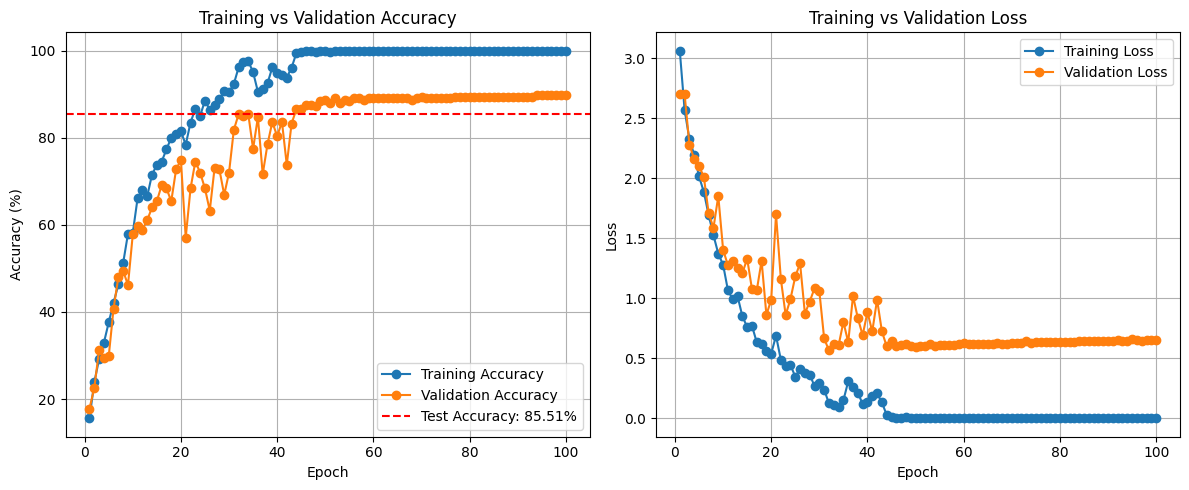

In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Inisialisasi variabel untuk menyimpan model terbaik
best_val_accuracy = 0.0
best_model_state = None

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(v.parameters(), lr=0.001, momentum=0.9)

# Inisialisasi list untuk menyimpan akurasi dan loss
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
test_accuracy = 0  # Akurasi pengujian hanya dihitung sekali di akhir

num_epochs = 100
for epoch in range(num_epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0
    running_loss = 0.0  # Untuk menghitung training loss per epoch
    
    # Loop untuk setiap batch dalam trainloader
    for i, data in tqdm(enumerate(trainloader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Menghitung jumlah prediksi yang benar
        _, predicted = torch.max(outputs.data, 1)  # Ambil kelas dengan probabilitas tertinggi
        total += labels.size(0)  # Menambah jumlah data yang telah diproses
        correct += (predicted == labels).sum().item()  # Hitung prediksi yang benar

        # Menghitung training loss
        running_loss += loss.item()

    # Akurasi dan loss per epoch pada data pelatihan
    accuracy = 100 * correct / total  # Akurasi dalam persentase
    epoch_loss = running_loss / len(trainloader)  # Rata-rata loss per epoch
    train_accuracies.append(accuracy)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {accuracy:.2f}%, Training Loss: {epoch_loss:.4f}')

    # Evaluasi pada data validasi
    v.eval()  # Set v ke mode evaluasi
    val_correct = 0
    val_total = 0
    val_running_loss = 0.0  # Untuk menghitung validation loss per epoch
    with torch.no_grad():  # Non-aktifkan perhitungan gradien
        for data in valloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = v(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()  # Menghitung validation loss
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * val_correct / val_total
    val_epoch_loss = val_running_loss / len(valloader)  # Rata-rata validation loss per epoch
    val_accuracies.append(val_accuracy)
    val_losses.append(val_epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {val_epoch_loss:.4f}')

    # Cek apakah model ini yang terbaik berdasarkan akurasi validasi
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_state = v.state_dict().copy()  # Simpan state dict model
        print(f'New best model found at epoch {epoch+1} with validation accuracy: {val_accuracy:.2f}%')
        # Anda juga bisa menyimpan model ke file di sini:
        torch.save(v.state_dict(), 'model_T2TViT.pth')

    v.train()  # Kembalikan v ke mode pelatihan

print('Finished Training')

# Load model terbaik sebelum evaluasi akhir
if best_model_state is not None:
    v.load_state_dict(best_model_state)
    print(f'Loaded best model with validation accuracy: {best_val_accuracy:.2f}%')

# Evaluasi pada data uji setelah pelatihan selesai
v.eval()  # Set v ke mode evaluasi
test_correct = 0
test_total = 0
with torch.no_grad():  # Non-aktifkan perhitungan gradien
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = v(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# # Simpan model terbaik ke file (opsional)
# torch.save({
#     'model_state_dict': best_model_state,
#     'best_val_accuracy': best_val_accuracy,
#     'test_accuracy': test_accuracy,
# }, 'best_model.pth')

# Plot grafik perbandingan akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
# plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

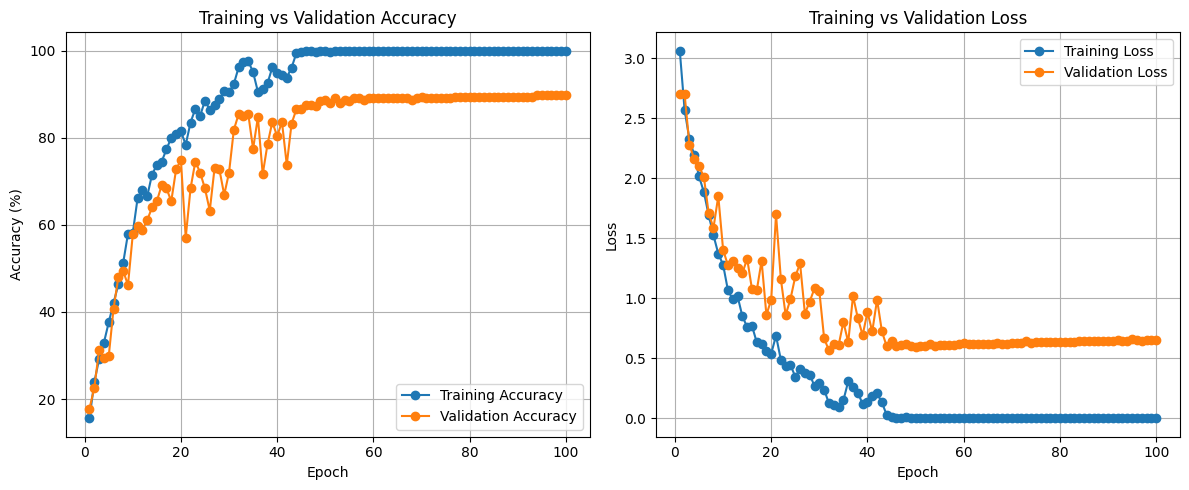

In [8]:
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
# plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Create a DataFrame with the training and validation results
results_df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Loss': train_losses,
    'Validation Loss': val_losses
})

# Save the DataFrame to a CSV file
results_csv_path = 'training_results_CAiT.csv'
results_df.to_csv(results_csv_path, index=False)
print(f"Training results saved to {results_csv_path}")

Training results saved to training_results_CAiT.csv


In [26]:
PATH = './model_CAiT.pth'
torch.save(v.state_dict(), PATH)
print(f"Model saved to {PATH}")

Model saved to ./model_CAiT.pth


In [9]:
import torch
import csv
from collections import OrderedDict

# Prepare to count predictions for each class
classes = ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 
           'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 
           'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 
           'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 
           'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 
           'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 
           'Mangifera Indica (Mango)', 'Mentha (Mint)', 
           'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 
           'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 
           'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 
           'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 
           'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 
           'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 
           'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 
           'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# No gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))  # Ganti 'v' dengan 'model' jika perlu
        _, predictions = torch.max(outputs, 1)
        
        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            class_name = classes[label]
            total_pred[class_name] += 1
            if label == prediction:
                correct_pred[class_name] += 1

# Calculate accuracy and prepare data for CSV
results = []
for classname in classes:
    accuracy = 100 * float(correct_pred[classname]) / total_pred[classname] if total_pred[classname] != 0 else 0
    results.append({
        'Class': classname,
        'Correct_Predictions': correct_pred[classname],
        'Total_Predictions': total_pred[classname],
        'Accuracy (%)': round(accuracy, 2)
    })

# Save to CSV
csv_filename = 'conf_matrix_T2TViT.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Class', 'Correct_Predictions', 'Total_Predictions', 'Accuracy (%)']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for row in results:
        writer.writerow(row)

print(f"\nConfusion matrix results saved to {csv_filename}")

# Print accuracy for each class
print("\nClass-wise Accuracy:")
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname] if total_pred[classname] != 0 else 0
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Confusion matrix results saved to conf_matrix_T2TViT.csv

Class-wise Accuracy:
Accuracy for class: Alpinia Galanga (Rasna) is 100.0 %
Accuracy for class: Amaranthus Viridis (Arive-Dantu) is 83.3 %
Accuracy for class: Artocarpus Heterophyllus (Jackfruit) is 100.0 %
Accuracy for class: Azadirachta Indica (Neem) is 85.7 %
Accuracy for class: Basella Alba (Basale) is 95.0 %
Accuracy for class: Brassica Juncea (Indian Mustard) is 100.0 %
Accuracy for class: Carissa Carandas (Karanda) is 92.3 %
Accuracy for class: Citrus Limon (Lemon) is 75.0 %
Accuracy for class: Ficus Auriculata (Roxburgh fig) is 85.7 %
Accuracy for class: Ficus Religiosa (Peepal Tree) is 92.3 %
Accuracy for class: Hibiscus Rosa-sinensis is 76.9 %
Accuracy for class: Jasminum (Jasmine) is 58.3 %
Accuracy for class: Mangifera Indica (Mango) is 71.4 %
Accuracy for class: Mentha (Mint) is 91.7 %
Accuracy for class: Moringa Oleifera (Drumstick) is 85.7 %
Accuracy for class: Muntingia Calabura (Jamaica Cherry-Gasagase) is 75.0

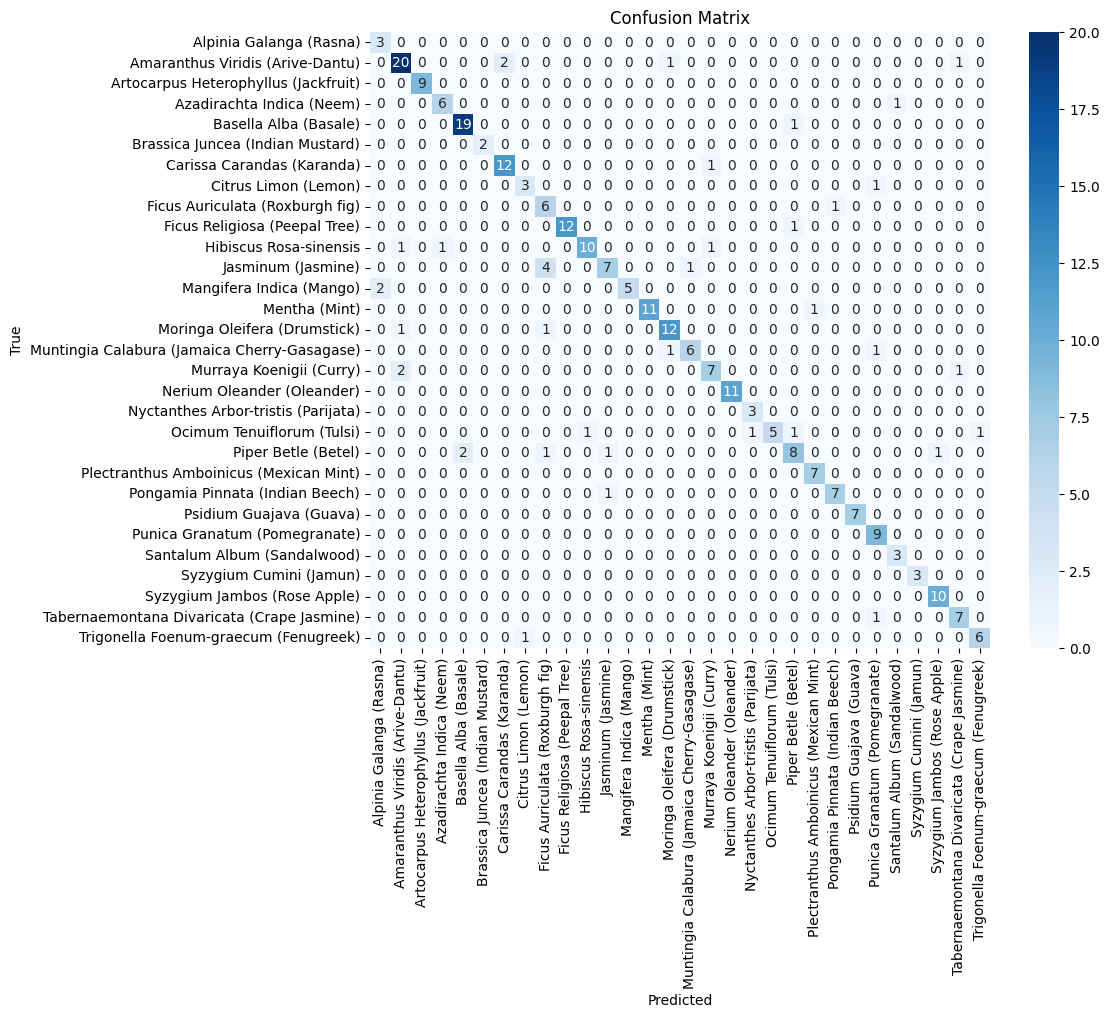

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mengumpulkan semua label sebenarnya dan prediksi
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Membuat confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()